In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import torch,torchvision

In [7]:
src_dir = '/Users/sagar/Desktop/AI_cap/segmentation/super-waddle/train_subset_1'
dest_dir = '/Users/sagar/Desktop/AI_cap/segmentation/super-waddle/data'
import os, shutil
for file in os.listdir(src_dir):
    file_path = os.path.join(src_dir, file)
    shutil.copy(file_path,dest_dir)

In [8]:
len(os.listdir(dest_dir))

265

In [36]:
path = '/Users/sagar/Desktop/AI_cap/segmentation/super-waddle/data/via_region_data.json'
f = open(path)
json_obj = json.load(f)

The json file has 235 keys named with respect to the jp file name i guess
Each json_obj[key] has 6 keys : dict_keys(['file_attributes', 'filename', 'regions', 'fileref', 'size', 'base64_img_data'])

seems like the key name explains what the object key contains

In [12]:
len(json_obj.keys())

264

In [43]:
img_dir = '/Users/sagar/Desktop/AI_cap/segmentation/train_subset_1'
img_path =img_dir +'/'+json_obj['DSC00592.JPG3640385']['filename']
import torch, torchvision

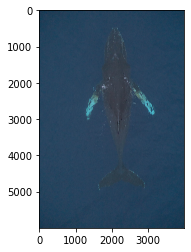

In [60]:
from torchvision.transforms import ToPILImage
img = torchvision.io.read_image(img_path)
c,w,h = img.shape
img = ToPILImage()(img)
plt.imshow(img)

In [22]:
import pandas as pd
from sklearn.model_selection import KFold
kf = KFold()
df = pd.DataFrame()
df['keys'] = list(json_obj.keys())
df['fold'] = 0





In [37]:
df = pd.read_csv('/Users/sagar/Desktop/AI_cap/segmentation/super-waddle/kfold_keys.csv')
for key in df['keys']:
    img_dir ='data'
    img_path = os.path.join(img_dir, json_obj[key]['filename'])
    img = torchvision.io.read_image(img_path)
    print(img.shape)

torch.Size([3, 6000, 4000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 6000, 4000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 6000, 4000])
torch.Size([3, 6000, 4000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 4000, 6000])
torch.Size([3, 6000,

In [29]:
for fold, (train_index,val_index) in enumerate(kf.split(df['keys'])):
    df.loc[val_index,'fold']=fold

print(val_index)
df

[212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263]


,keys,fold
0,DSC00592.JPG3640385,0
1,DSC04329.JPG5996544,0
2,DSC09270.JPG5505024,0
3,DSC00436.JPG5799936,0
4,DSC04470.JPG7372800,0
...,...,...
259,DSC09279.JPG5767168,4
260,DSC09055.JPG5603328,4
261,DSC00583.JPG3680049,4
262,DSC09069.JPG5603328,4


In [30]:
df.to_csv('kfold_keys.csv',index=False)

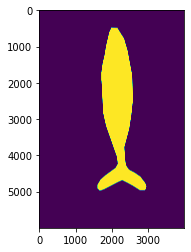

In [66]:
import skimage
p=json_obj['DSC00592.JPG3640385']['regions']['0']
mask = np.zeros(shape=(w,h,1))
rr, cc = skimage.draw.polygon(p['shape_attributes']['all_points_y'], p['shape_attributes']['all_points_x'])
mask[rr, cc, 0] = 1
plt.imshow(mask)

In [16]:
list(json_obj['DSC00592.JPG3640385']['regions']['0']['region_attributes'])

['body_part', 'species']

In [20]:
len(list(json_obj.keys()))

264